<a href="https://colab.research.google.com/github/seyma-tas/Brain-Tumor-Segmentation-Project/blob/master/1_BrainTumor_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the EDA(Exploratory Data Analysis) notebook. We understand the size, properties and classes of the brain tumor magnetic resonance imaging (MRI) results in the EDA notebook.

#### Mount Colab to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


#### Import the necessary libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("seaborn-darkgrid")

## About Data
Data original source https://figshare.com/articles/brain_tumor_dataset/1512427.

Data was first published on 02.04.2017, Version-5 is used in this project.


This brain tumor dataset containing 3064 T1-weighted contrast-inhanced images
from 233 patients with three kinds of brain tumor: meningioma (708 slices), 
glioma (1426 slices), and pituitary tumor (930 slices). There are totally 3064 images in the dataset. 



## Load Data



In [ ]:
data_images = np.load('/content/drive/My Drive/Brain-Tumor-Segmentation-Project/brain_tumor_dataset/images.npy', allow_pickle=True)
data_labels = np.load('/content/drive/My Drive/Brain-Tumor-Segmentation-Project/brain_tumor_dataset/labels.npy', allow_pickle=True)
data_masks = np.load('/content/drive/My Drive/Brain-Tumor-Segmentation-Project/brain_tumor_dataset/masks.npy', allow_pickle=True)
print(" Shapes:\n Images:",data_images.shape, "Masks:", data_masks.shape, "Labels:", data_labels.shape)

 Shapes:
 Images: (3064,) Masks: (3064,) Labels: (3064,)


## A sample from the data images

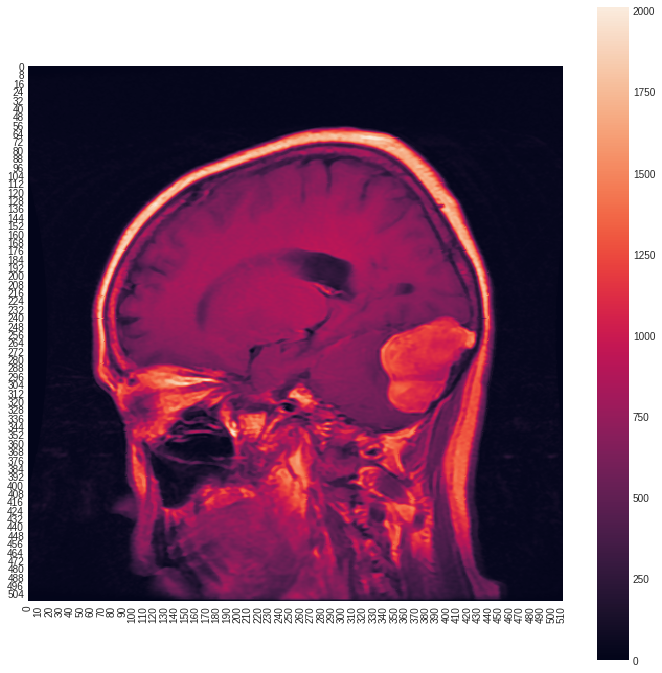

In [ ]:
fig = plt.figure(figsize=(12, 12))
sns.heatmap(data_images[110], square=True)
plt.show()

## Ground truth mask for the same image

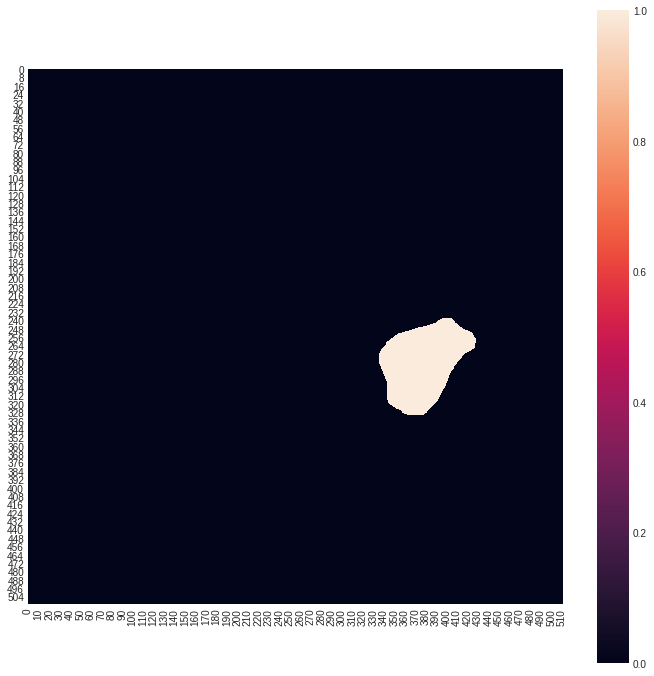

In [ ]:
fig = plt.figure(figsize=(12, 12))
sns.heatmap(data_masks[110], square=True)
plt.show()

## Distribution of data to the classes

Number of Meningioma tumors: 708 
Number of Glioma tumors: 1426 
Number of Pituitary tumor tumors: 930 


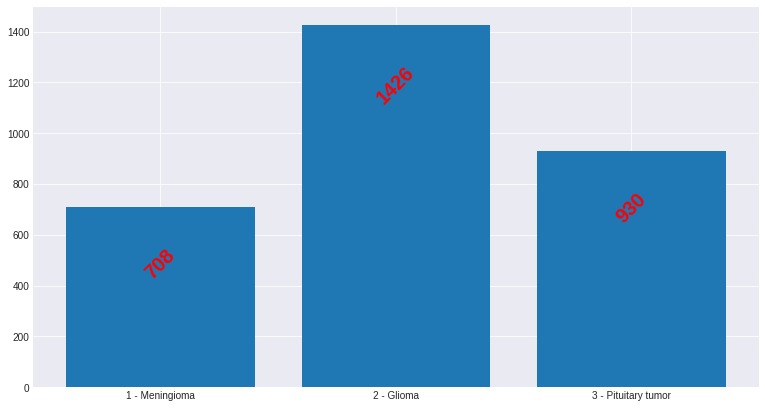

In [ ]:
plt.figure(figsize=(13, 7))
class_labels = {'1': 'Meningioma', '2': 'Glioma', '3': 'Pituitary tumor'}
classes, counts = np.unique(data_labels, return_counts=True)

plt.bar(classes, counts,
        tick_label=['1 - Meningioma', '2 - Glioma', '3 - Pituitary tumor'])

for i, idx in enumerate(classes):
    print('Number of {} tumors: {} '.format(class_labels[str(idx)], counts[i]))

    labels=[1,2,3]   
for label, count in zip(labels,counts):

    plt.annotate(int(count), xy=(label, count-150), 
                rotation=45, color="red", 
                ha="center", verticalalignment='top', 
                fontsize=20, fontweight="bold")

## Samples from each class and their masks

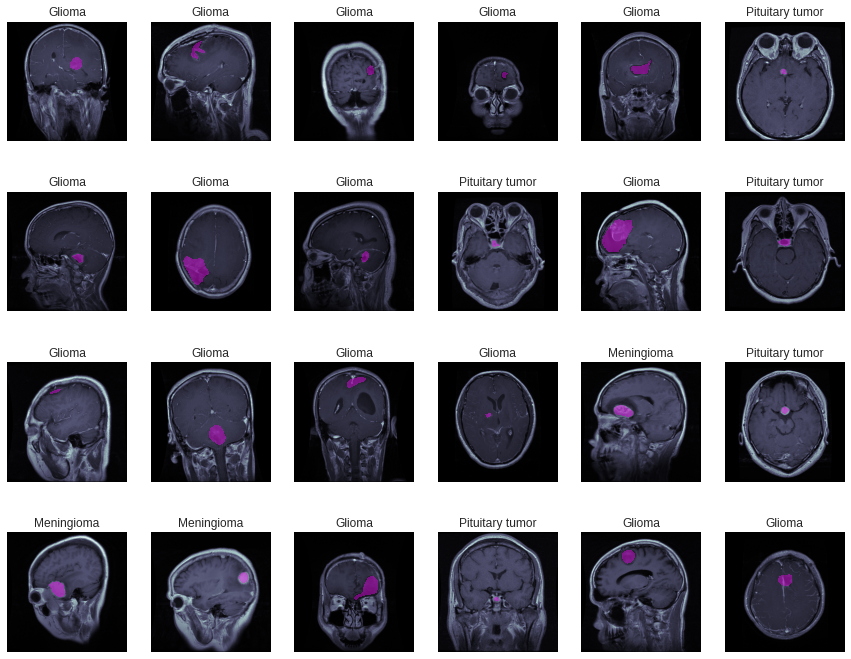

In [ ]:
plt.figure(figsize=(15, 12))
for i, idx in enumerate(np.random.randint(data_images.shape[0], size=24), start=1):
    #plot the MRI image
    plt.subplot(4, 6, i)
    plt.imshow(data_images[idx], cmap='bone')
    
    #plot the mask
    mask = np.ma.masked_where(data_masks[idx] == False, data_masks[idx])
    plt.imshow(mask, alpha=0.4, cmap='spring')
    
    plt.title(class_labels[str(data_labels[idx])])
    plt.axis('off')
